# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

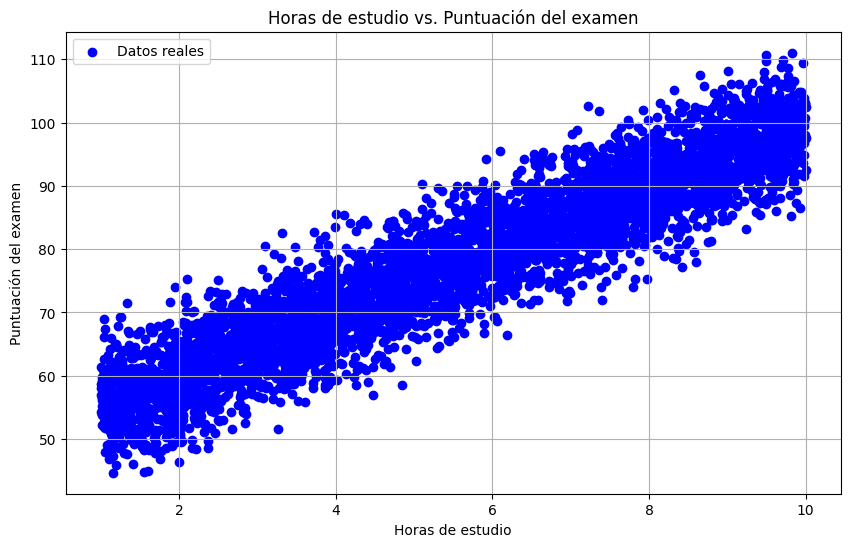

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

## Implementación de la Regresión Lineal con Descenso de Gradiente

In [5]:
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = self.predict(X)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [6]:
# Entrenar el modelo personalizado
custom_model = CustomLinearRegression(learning_rate=0.01, n_iterations=10000)
custom_model.fit(X_train, y_train)

## Implementación con Scikit-learn

In [7]:
# Entrenar el modelo de scikit-learn
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

LinearRegression()

## Comparación de Pesos

In [8]:
print(f'Peso (w) del modelo personalizado: {custom_model.weights[0]:.4f}')
print(f'Sesgo (b) del modelo personalizado: {custom_model.bias:.4f}')
print(f'Peso (w) del modelo de sklearn: {sklearn_model.coef_[0]:.4f}')
print(f'Sesgo (b) del modelo de sklearn: {sklearn_model.intercept_:.4f}')

Peso (w) del modelo personalizado: 5.0145
Sesgo (b) del modelo personalizado: 49.8429
Peso (w) del modelo de sklearn: 5.0145
Sesgo (b) del modelo de sklearn: 49.8429


## Evaluación de los Modelos

In [9]:
# Predicciones
y_pred_custom = custom_model.predict(X_test)
y_pred_sklearn = sklearn_model.predict(X_test)

# Métricas de evaluación
print('--- Métricas del Modelo Personalizado ---')
print(f'MSE: {mean_squared_error(y_test, y_pred_custom):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_custom):.4f}')
print(f'R2 Score: {r2_score(y_test, y_pred_custom):.4f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_custom):.4f}')

print('--- Métricas del Modelo de Scikit-learn ---')
print(f'MSE: {mean_squared_error(y_test, y_pred_sklearn):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_sklearn):.4f}')
print(f'R2 Score: {r2_score(y_test, y_pred_sklearn):.4f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_sklearn):.4f}')

--- Métricas del Modelo Personalizado ---
MSE: 25.8702
MAE: 3.9602
R2 Score: 0.8692
MAPE: 0.0535
--- Métricas del Modelo de Scikit-learn ---
MSE: 25.8702
MAE: 3.9602
R2 Score: 0.8692
MAPE: 0.0535


## Visualización de Resultados

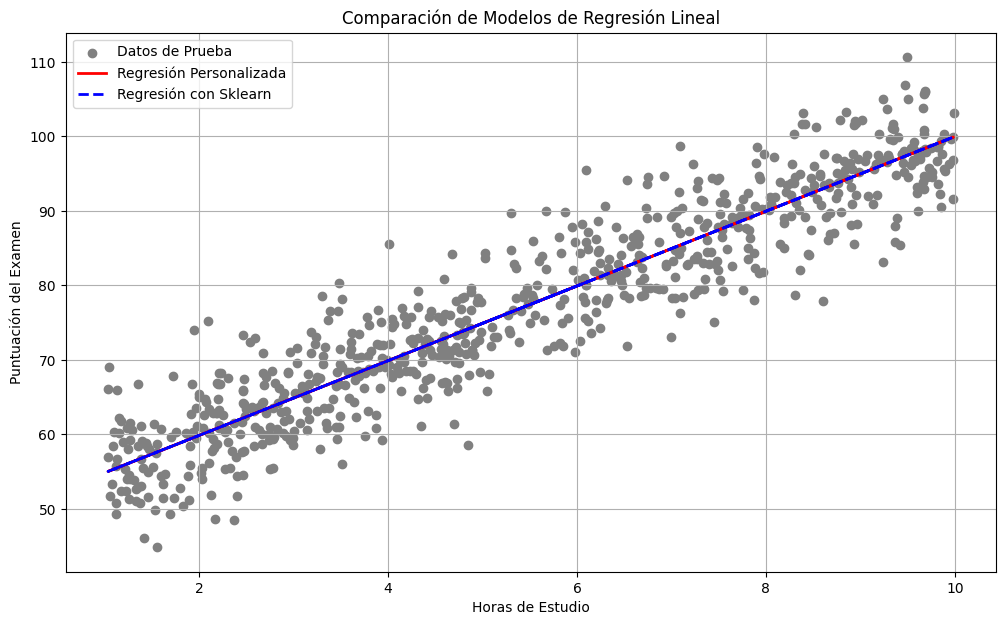

In [10]:
plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color='gray', label='Datos de Prueba')
plt.plot(X_test, y_pred_custom, color='red', linewidth=2, label='Regresión Personalizada')
plt.plot(X_test, y_pred_sklearn, color='blue', linestyle='--', linewidth=2, label='Regresión con Sklearn')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntuación del Examen')
plt.title('Comparación de Modelos de Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()